<a href="https://colab.research.google.com/github/Tankasala25/PyTorch/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Are We Actually Building With the make_moons Model?

We are training a **binary classification neural network** that learns to separate two moon-shaped groups of points.

The make_moons dataset contains **1000 points** arranged in the shape of **two interlocking half-moons**:

- One moon is labeled **0**
- The other moon is labeled **1**

Each point has **two features**:

- x-coordinate  
- y-coordinate  

The job of the model is to look at these two numbers (**x₁, x₂**) and decide:

> “Does this point belong to moon 0 or moon 1?”

---

## 🧠 What the Neural Network Learns

The model learns **non-linear patterns**, such as:

- Moon 0 points curve in one shape  
- Moon 1 points curve in the opposite shape  
- The boundary between them is **not a straight line**  
- So simple models (like logistic regression) fail  
- But neural networks can learn this curved decision boundary

During training, the model:

1. **Takes input**: (x₁, x₂) → coordinates of a point  
2. **Passes it through hidden layers** with ReLU  
3. **Learns a rule** that separates the two moons  
4. **Outputs two scores** (logits)  
5. The class with the highest score is chosen using `argmax()`  

---

## 🎯 Final Goal of the Model

The final neural network is a classifier that can:

- Take any point on the 2D plane  
- Decide which moon it belongs to  
- Draw a smooth curved boundary between the two classes

In simple words:

> We are building an AI model that understands the shape of two moons  
> and learns to classify every point into moon 0 or moon 1.

---

## 🌟 Why This Dataset Is Useful

- It is **non-linear**, so the model learns more than a straight line boundary  
- Small and fast to train  
- Excellent for visualizing how neural networks learn complex shapes  
- Great intro to **binary classification + non-linear boundaries**


In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [3]:
X,y=make_moons(n_samples=1000,noise=0.1,random_state=42)

In [18]:
X.shape

(1000, 2)

In [19]:
y.shape

(1000,)

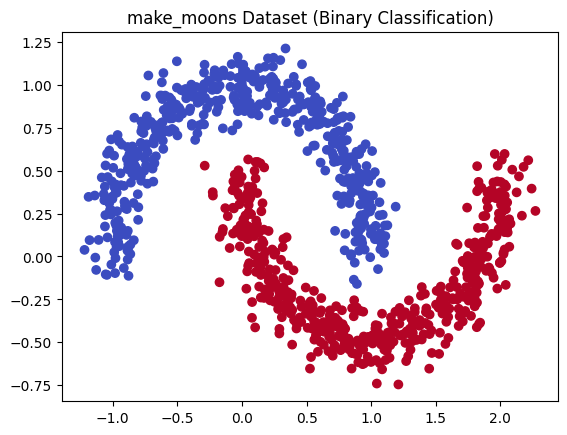

In [6]:
# plot the two moon-shaped classes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.title("make_moons Dataset (Binary Classification)")
plt.show()


In [30]:
df=pd.DataFrame(X, columns=['X1','X2'])
df['target']=y

In [33]:
X=df.drop('target',axis=1)
y=df['target']

In [34]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [42]:
class MoonModel(nn.Module):

  def __init__(self,infeatures=2,h1=6,h2=8,outfeatures=2):
    super().__init__()
    self.fc1=nn.Linear(infeatures,h1)
    self.fc2=nn.Linear(h1,h2)
    self.fc3=nn.Linear(h2,outfeatures)

  def forward(self,X):
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)

    return X



In [43]:
model=MoonModel()

model.eval()

MoonModel(
  (fc1): Linear(in_features=2, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=2, bias=True)
)

In [44]:
loss_fn = nn.CrossEntropyLoss()

# Adam optimizer with learning rate 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [47]:
epochs=100
losses=[]
for epoch in range(epochs):

  #forward function
  y_pred=model.forward(X_train)

  #loss
  l=loss_fn(y_pred,y_train)

  losses.append(l.detach().numpy())

  #optimizer zero grad
  optimizer.zero_grad()

  #loss bacckward
  l.backward()

  #optimizer step
  optimizer.step()

  if epoch%10==0:
    print(f"epoch: {epoch} and loss : {l}")



epoch: 0 and loss : 0.12266769260168076
epoch: 10 and loss : 0.08928269147872925
epoch: 20 and loss : 0.060109782963991165
epoch: 30 and loss : 0.04040498659014702
epoch: 40 and loss : 0.02822055108845234
epoch: 50 and loss : 0.020839419215917587
epoch: 60 and loss : 0.016257552430033684
epoch: 70 and loss : 0.013263898901641369
epoch: 80 and loss : 0.011197838000953197
epoch: 90 and loss : 0.009667233563959599


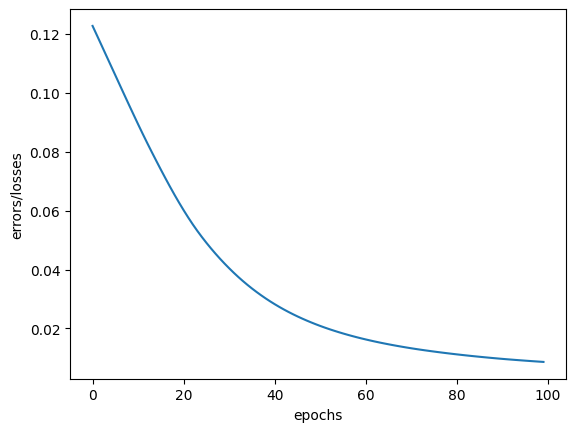

In [49]:
plt.plot(range(epochs),losses)
plt.ylabel('errors/losses')
plt.xlabel('epochs')
plt.show()

In [60]:
with torch.no_grad():
  y_eval=model.forward(X_test)
  preds=torch.argmax(y_eval,dim=1)

num_correct = (preds== y_test).sum()
print(num_correct)

tensor(200)


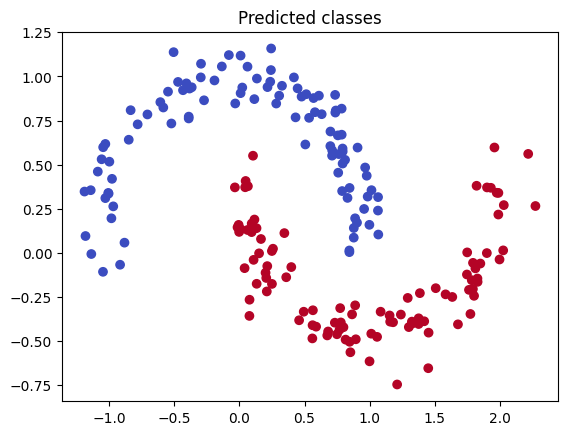

In [55]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds, cmap="coolwarm")
plt.title("Predicted classes")
plt.show()

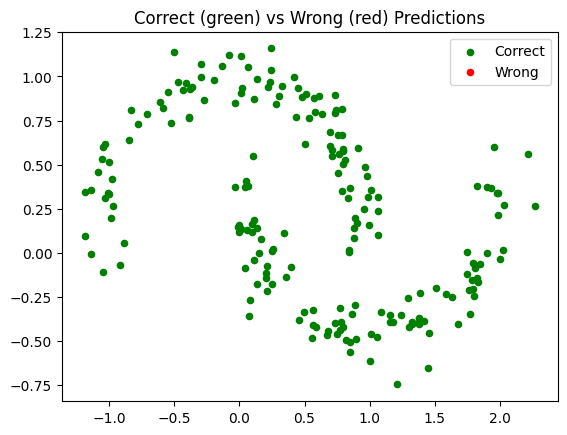

In [61]:
correct_mask = (preds == y_test)

plt.scatter(X_test[correct_mask, 0], X_test[correct_mask, 1],
            c='green', s=20, label="Correct")

plt.scatter(X_test[~correct_mask, 0], X_test[~correct_mask, 1],
            c='red', s=20, label="Wrong")

plt.legend()
plt.title("Correct (green) vs Wrong (red) Predictions")
plt.show()


In [62]:
correct_mask = preds == y_test

# numbers
num_correct = correct_mask.sum().item()
num_wrong = (~correct_mask).sum().item()

# accuracy
accuracy = correct_mask.float().mean().item()

print("Correct predictions:", num_correct)
print("Wrong predictions:", num_wrong)
print("Accuracy:", accuracy)

Correct predictions: 200
Wrong predictions: 0
Accuracy: 1.0


In [63]:
#save the model
torch.save(obj=model.state_dict(),f='Binaryclassification_model.pth')

In [64]:
#load the model
new_moon_model=MoonModel()
new_moon_model.load_state_dict(torch.load(f='Binaryclassification_model.pth'))

<All keys matched successfully>

In [66]:
new_moon_model.eval()

MoonModel(
  (fc1): Linear(in_features=2, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=2, bias=True)
)